In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import os
import cv2
import tensorflow as tf
from keras.layers import Input, Conv2D
from keras.models import Model
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
!pip3 install tensorflow==2.2
!pip3 install keras==2.3.1
!pip3 install -U segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516.2 MB 4.2 kB/s 
     |████████████████████████████████| 2.9 MB 44.6 MB/s 
     |████████████████████████████████| 3.0 MB 20.3 MB/s 
     |████████████████████████████████| 454 kB 21.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 377 kB 8.1 MB/s 
     |████████████████████████████████| 50 kB 7.8 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import segmentation_models as sm
import keras
import tensorflow as tf
import keras.backend as K
keras.backend.set_image_data_format('channels_last')

Segmentation Models: using `keras` framework.


In [4]:
model = tf.keras.models.load_model('/content/cce_dice_loss_pretrained.h5')

In [5]:
!pip install gradio 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 8.0 MB/s 
     |████████████████████████████████| 272 kB 56.0 MB/s 
     |████████████████████████████████| 140 kB 61.1 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 2.3 MB 54.3 MB/s 
     |████████████████████████████████| 84 kB 4.4 MB/s 
     |████████████████████████████████| 212 kB 51.3 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 57 kB 5.8 MB/s 
     |████████████████████████████████| 1.1 MB 57.1 MB/s 
     |████████████████████████████████| 144 kB 59.3 MB/s 
     |████████████████████████████████| 271 kB 59.6 MB/s 
     |████████████████████████████████| 94 kB 4.2 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 80 kB 10.6 MB/s 
     |████████████████████████████████| 68 kB

In [6]:
import gradio as gr

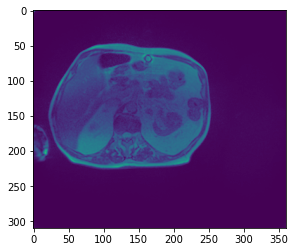

In [11]:
import cv2
img=mpimg.imread('/content/slice_0062_360_310_1.50_1.50.png')
# img=cv2.imread('/content/slice_0062_360_310_1.50_1.50.png')

plt.imshow(img)

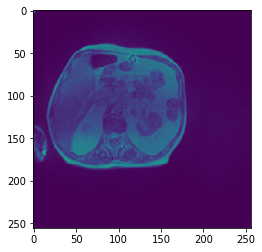

In [12]:
img = cv2.resize(img, (256,256), interpolation=cv2.INTER_NEAREST)#[:,:,0]
plt.imshow(img)

In [13]:
img.shape

(256, 256)

In [14]:
  x = img.reshape(1, 256, 256, 1) 
  y = model.predict(x)

In [15]:
y.shape

(1, 256, 256, 4)

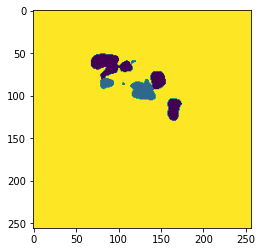

In [17]:
plt.imshow(y[0,...].argmax(axis=2))

In [18]:
img.max(),img.min(), img.std(),img.mean()

(0.20729381, 0.0, 0.024881922, 0.016629579)

In [20]:
def segment(img):
  type(img)
  # img=mpimg.imread(img)
  img = cv2.resize(img, (256,256), interpolation=cv2.INTER_NEAREST)[:,:,0]
  x = img.reshape(1, 256, 256, 1) 
  y = model.predict(x)
  return y[0,:,:,:].argmax(axis=2)#img.max()#type(img)#
  # fig_object = plt.figure()
  # plt.imshow(y[0,...].argmax(axis=2))
  # plt.hist(img)
  # return img[50:100,50:100,0]#[img.max(),img.min(), img.std(),img.mean()]#fig_object#img.max()#fig_object

In [21]:
# webcam = gr.inputs.Image(shape=(256,256), source="upload", type='file')
# webapp = gr.interface.Interface(fn=segment, inputs="image", outputs="text")
webapp = gr.interface.Interface(fn=segment, inputs="image", outputs="image")
webapp.launch(debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://26068.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f7794c29b90>,
 'http://127.0.0.1:7860/',
 'https://26068.gradio.app')

In [ ]:
??gr.interface.Interface